In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [6]:
train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [7]:
train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [8]:
train.duplicated().sum()

0

In [9]:
train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [10]:
for col in ['fuel_type','accident','clean_title']:
    print(train[col].value_counts())

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64
accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64
clean_title
Yes    167114
Name: count, dtype: int64


In [11]:
#removing NA's
def remove_na(df):
    df['fuel_type'] = df['fuel_type'].fillna('none')
    df['fuel_type'] = df['fuel_type'].replace({'\u2013':'none','not supported':'none'})
    df['accident'] = df['accident'].fillna('None reported')
    df['clean_title'] = df['clean_title'].fillna('none')
    return df

In [12]:
train = remove_na(train)
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,none,84900


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='fuel_type'>

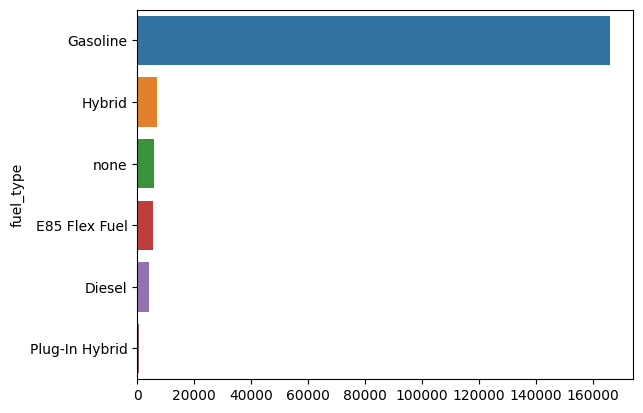

In [14]:
sns.barplot(x = train['fuel_type'].value_counts().values, y = train['fuel_type'].value_counts().index)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


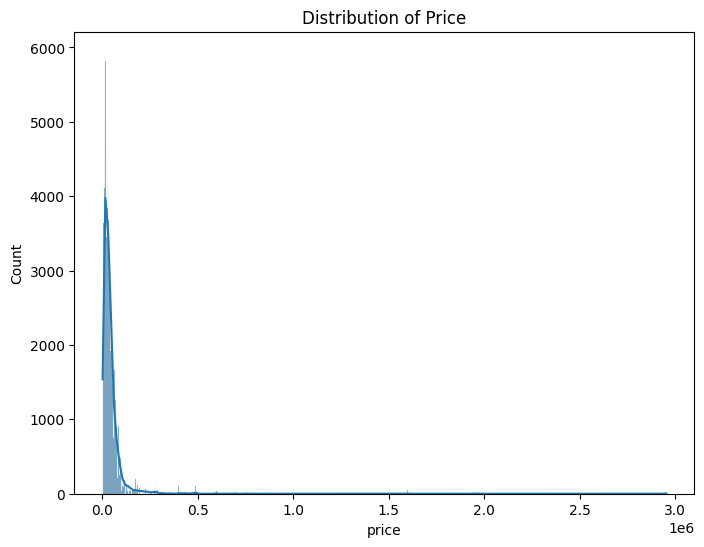

In [15]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=train['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [16]:
#Checking the skewness of the numerical columns
train.skew(numeric_only=True)

id             0.000000
model_year    -1.044511
milage         0.895062
price         20.268453
dtype: float64

The price column is right skewed as we can see from the diagram and from the results above

Checking if there are any 0 values in the price column

In [17]:
train[train['price'] == 0]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [18]:
train['price'].min()

2000

Applying log transformation to reduce the skewnes

In [19]:
train['price_log'] = np.log(train['price'])

Visualising price column after using log transformation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


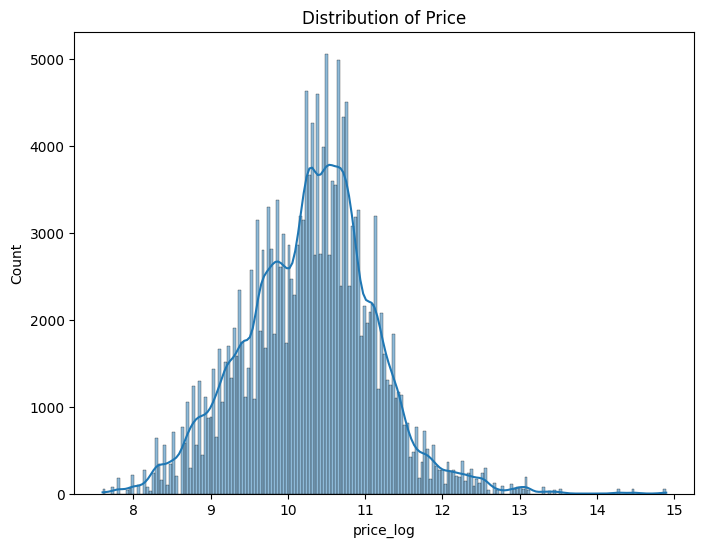

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train['price_log'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [21]:
train.skew(numeric_only=True)

id             0.000000
model_year    -1.044511
milage         0.895062
price         20.268453
price_log      0.107732
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

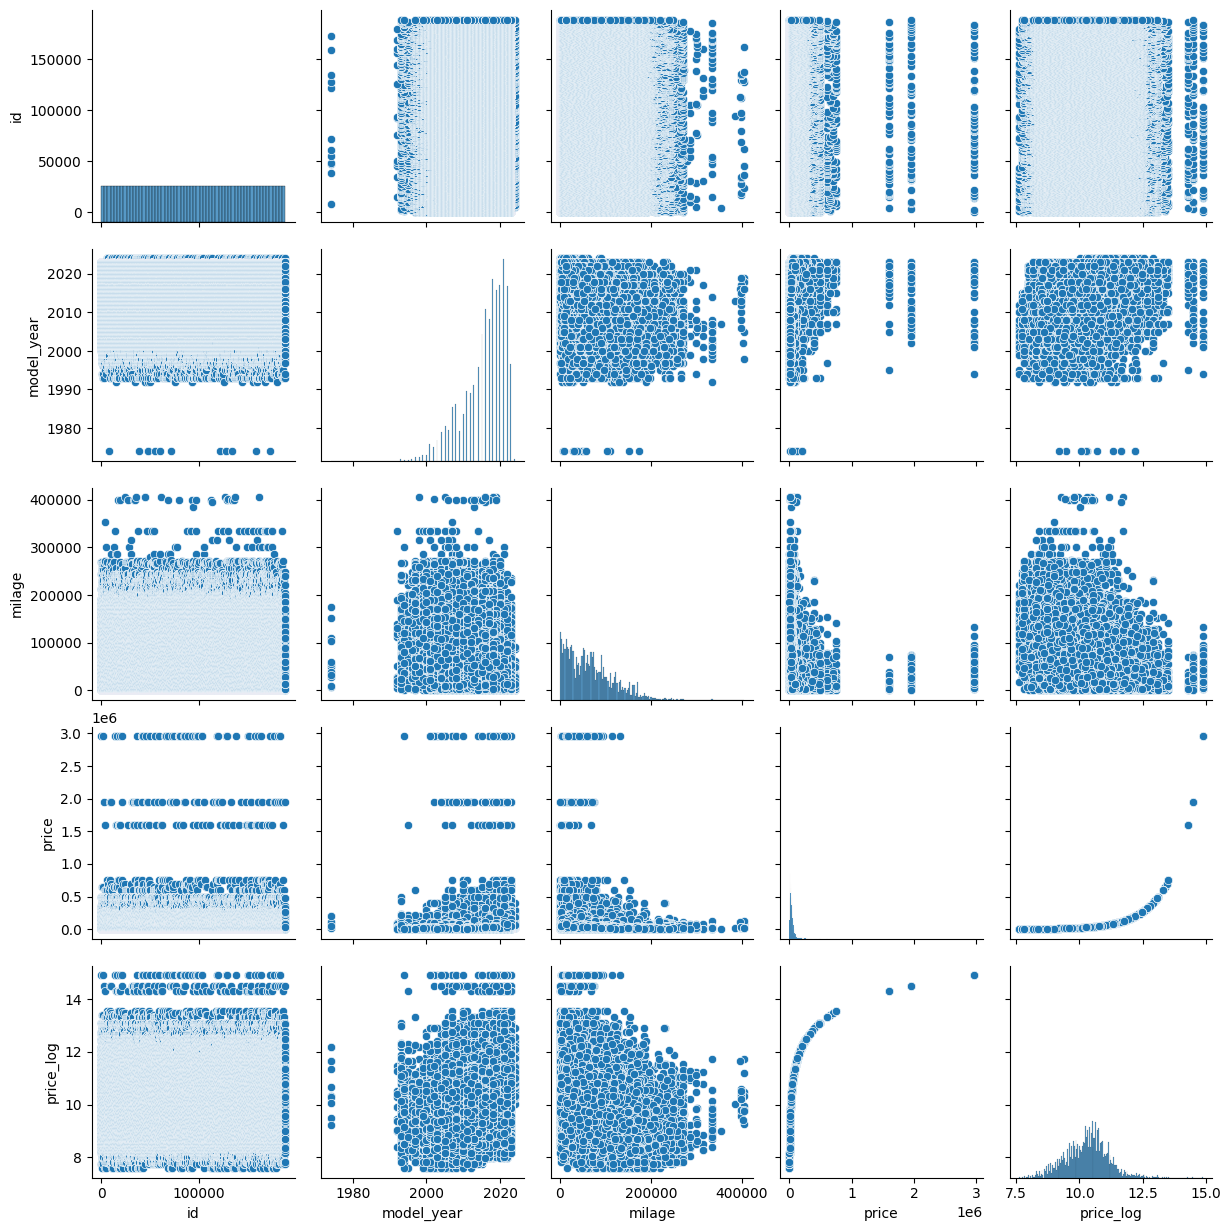

In [22]:
sns.pairplot(train)

In [23]:
import re

In [24]:
def engine(df):
    df['engine_HP'] = df['engine'].apply(lambda x:x.split('HP')[0] if 'HP' in x else np.nan).astype(float)
    df['engine_cyl'] = df['engine'].apply(lambda x: re.search(r'(\d+\.?\d*)\sCylinder', x).group(1) if re.search(r'(\d+\.?\d*)\sCylinder', x) else np.nan).astype(float)
    df['engine_volume'] = df['engine'].apply(lambda x: re.search(r'(\d+\.?\d*)L', x).group(1) if re.search(r'(\d+\.?\d*)L', x) else np.nan).astype(float)
    # Replace NaN with median for each column
    df['engine_HP'].fillna(df['engine_HP'].median(), inplace=True)
    df['engine_cyl'].fillna(df['engine_cyl'].median(), inplace=True)
    df['engine_volume'].fillna(df['engine_volume'].median(), inplace=True)
    df['transmission_Speed'] = df['transmission'].str.extract(r'^(\d+)').fillna(0)

    df.drop(['engine','price','transmission'], axis = 1, inplace = True)
    return df


In [25]:
def clean_transmission(df):
    
    if 'A/T' in df['transmission'] or 'Automatic' in df['transmission']:
        return 'Automatic'
    elif 'M/T' in df['transmission'] or 'Manual' in df['transmission']:
        return 'Manual'
    else:
        return 'Unknown'
    

In [26]:
train['transmission_type'] = clean_transmission(train)
train = engine(train)
train

/tmp/ipykernel_30/211242595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine_HP'].fillna(df['engine_HP'].median(), inplace=True)
/tmp/ipykernel_30/211242595.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,price_log,transmission_type,engine_HP,engine_cyl,engine_volume,transmission_Speed
0,0,MINI,Cooper S Base,2007,213000,Gasoline,Yellow,Gray,None reported,Yes,8.342840,Unknown,172.0,4.0,1.6,0
1,1,Lincoln,LS V8,2002,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,Yes,8.516993,Unknown,252.0,8.0,3.9,0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,Blue,Gray,None reported,Yes,9.539644,Unknown,320.0,8.0,5.3,0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Black,Black,None reported,Yes,10.714418,Unknown,420.0,8.0,5.0,0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,Black,Beige,None reported,Yes,11.487608,Unknown,208.0,4.0,2.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,White,Beige,None reported,Yes,10.221941,Unknown,420.0,8.0,6.2,0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,White,Black,At least 1 accident or damage reported,Yes,10.308953,Unknown,385.0,6.0,3.0,8
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,White,Black,None reported,Yes,11.372513,Unknown,469.0,8.0,4.0,7
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,Daytona Gray Pearl Effect,Black,None reported,none,11.349229,Unknown,329.0,6.0,3.0,1


#### Label Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown ='use_encoded_value', unknown_value = -1)

# Fit on training data

col_to_encode = ['brand','model','fuel_type',
       'transmission_type', 'ext_col', 'int_col', 'accident', 'clean_title']
encoder.fit(train[col_to_encode])
train[col_to_encode] = encoder.fit_transform(train[col_to_encode])
train.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,price_log,transmission_type,engine_HP,engine_cyl,engine_volume,transmission_Speed
0,0,31.0,495.0,2007,213000,2.0,312.0,71.0,1.0,0.0,8.342840,0.0,172.0,4.0,1.6,0
1,1,28.0,930.0,2002,143250,2.0,263.0,10.0,0.0,0.0,8.516993,0.0,252.0,8.0,3.9,0
2,2,9.0,1575.0,2002,136731,1.0,38.0,71.0,1.0,0.0,9.539644,0.0,320.0,8.0,5.3,0
3,3,16.0,758.0,2017,19500,2.0,29.0,14.0,1.0,0.0,10.714418,0.0,420.0,8.0,5.0,0
4,4,36.0,1077.0,2021,7388,2.0,29.0,10.0,1.0,0.0,11.487608,0.0,208.0,4.0,2.0,7


#### Standardization

In [28]:
X = train.drop(['price_log'],axis = 1)
X

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,transmission_type,engine_HP,engine_cyl,engine_volume,transmission_Speed
0,0,31.0,495.0,2007,213000,2.0,312.0,71.0,1.0,0.0,0.0,172.0,4.0,1.6,0
1,1,28.0,930.0,2002,143250,2.0,263.0,10.0,0.0,0.0,0.0,252.0,8.0,3.9,0
2,2,9.0,1575.0,2002,136731,1.0,38.0,71.0,1.0,0.0,0.0,320.0,8.0,5.3,0
3,3,16.0,758.0,2017,19500,2.0,29.0,14.0,1.0,0.0,0.0,420.0,8.0,5.0,0
4,4,36.0,1077.0,2021,7388,2.0,29.0,10.0,1.0,0.0,0.0,208.0,4.0,2.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,8.0,604.0,2017,49000,2.0,304.0,10.0,1.0,0.0,0.0,420.0,8.0,6.2,0
188529,188529,36.0,206.0,2018,28600,2.0,304.0,14.0,0.0,0.0,0.0,385.0,6.0,3.0,8
188530,188530,36.0,223.0,2021,13650,2.0,304.0,14.0,1.0,0.0,0.0,469.0,8.0,4.0,7
188531,188531,3.0,1471.0,2022,13895,2.0,82.0,14.0,1.0,1.0,0.0,329.0,6.0,3.0,1


In [29]:
y = train['price_log']
y

0          8.342840
1          8.516993
2          9.539644
3         10.714418
4         11.487608
            ...    
188528    10.221941
188529    10.308953
188530    11.372513
188531    11.349229
188532    10.274879
Name: price_log, Length: 188533, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler on the training features
X_train_scaled = scaler_X.fit_transform(X_train)

# Fit the scaler on the training target
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [34]:
def train_and_eval(model,model_name):
    model.fit(X_train_scaled,y_train_scaled)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    train_mse = mean_squared_error(y_train_scaled,y_train_pred)
    val_mse = mean_squared_error(y_val_scaled,y_val_pred)                     
    print("Train_rmse:", np.sqrt(train_mse))
    print("Val_rmse:",np.sqrt(val_mse))
    print("R2 score:", r2_score(y_val_scaled,y_val_pred))
    print("\n")

In [35]:
lr = LinearRegression()
train_and_eval(lr, "Linear Regression")

Train_rmse: 0.6313099093301378
Val_rmse: 0.6337876115099486
R2 score: 0.5972830389227921




In [88]:
# svr = SVR()
# train_and_eval(svr, "Svm")

Train_rmse: 0.5844322911509027
Val_rmse: 0.6024387438150123
R2 score: 0.6364436734544386




In [86]:
# dt = DecisionTreeRegressor()
# train_and_eval(dt, "decision tree")

Train_rmse: 2.7623616469626022e-18
Val_rmse: 0.8489745344760877
R2 score: 0.27800324603718096




Decision tree and random forest are underfitting like crazy

In [41]:
rf = RandomForestRegressor(random_state=42)
train_and_eval(rf, "Random Forest")

Train_rmse: 0.22258989514494518
Val_rmse: 0.6021899814957182
R2 score: 0.6364371651190173




In [99]:
gb = GradientBoostingRegressor()
train_and_eval(gb,"Gradient Boosting")

Train_rmse: 0.5894794443098198
Val_rmse: 0.5952421046013219
R2 score: 0.6447781135334927




In [36]:
xgb = XGBRegressor(eval_metric = 'rmse')
train_and_eval(xgb, "xtreme gradient boosting")

Train_rmse: 0.5431631920954687
Val_rmse: 0.5882677846403042
R2 score: 0.6530534600471529




In [37]:
xgboost_params = {
    'booster': ['gbtree', 'gblinear', 'dart'],  # Model type
    
    # Booster Parameters
    'eta': [0.01, 0.05, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 5, 7, 10],  # Maximum depth of a tree
    
    # Regularization Parameters
    'alpha': [0, 0.5, 1],  # L1 regularization term
    'lambda': [1, 3, 5, 10],  # L2 regularization term
    
    # Additional Parameters
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator = xgb,param_grid = xgboost_params, cv= 5 )

In [123]:
lgbm = LGBMRegressor()
train_and_eval(lgbm, "light gbm")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1548
[LightGBM] [Info] Number of data points in the train set: 126317, number of used features: 14
[LightGBM] [Info] Start training from score 0.000000
Train_rmse: 0.571983061716747
Val_rmse: 0.5865841728881094
R2 score: 0.6550365276641854




#### Testing

In [101]:
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [102]:
test = remove_na(test)
test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,none
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,none
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,none
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [103]:
def feature_eng(df):
    df['engine_HP'] = df['engine'].apply(lambda x:x.split('HP')[0] if 'HP' in x else np.nan).astype(float)
    df['engine_cyl'] = df['engine'].apply(lambda x: re.search(r'(\d+\.?\d*)\sCylinder', x).group(1) if re.search(r'(\d+\.?\d*)\sCylinder', x) else np.nan).astype(float)
    df['engine_volume'] = df['engine'].apply(lambda x: re.search(r'(\d+\.?\d*)L', x).group(1) if re.search(r'(\d+\.?\d*)L', x) else np.nan).astype(float)
    # Replace NaN with median for each column
    df['engine_HP'].fillna(df['engine_HP'].median(), inplace=True)
    df['engine_cyl'].fillna(df['engine_cyl'].median(), inplace=True)
    df['engine_volume'].fillna(df['engine_volume'].median(), inplace=True)
    df['transmission_Speed'] = df['transmission'].str.extract(r'^(\d+)').fillna(0)
    df.drop(['engine','transmission'], axis = 1, inplace = True)
    return df

In [104]:
test['transmission_type'] = clean_transmission(test)
test = feature_eng(test)
test

/tmp/ipykernel_30/2970952659.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine_HP'].fillna(df['engine_HP'].median(), inplace=True)
/tmp/ipykernel_30/2970952659.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,transmission_type,engine_HP,engine_cyl,engine_volume,transmission_Speed
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,White,Beige,None reported,Yes,Unknown,240.0,4.0,2.0,6
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,Silver,Black,None reported,Yes,Unknown,395.0,6.0,3.0,8
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,White,Ebony,None reported,none,Unknown,328.0,6.0,3.5,10
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,Silician Yellow,Black,None reported,none,Unknown,328.0,6.0,3.5,0
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,Gray,Black,None reported,Yes,Unknown,252.0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,Black,Black,None reported,Yes,Unknown,362.0,6.0,3.0,7
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,White,Black,None reported,none,Unknown,328.0,6.0,3.5,0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,Black,Black,None reported,Yes,Unknown,333.0,6.0,3.0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,Black,Black,None reported,Yes,Unknown,333.0,6.0,3.0,0


In [107]:
test.isna().sum()

id                    0
brand                 0
model                 0
model_year            0
milage                0
fuel_type             0
ext_col               0
int_col               0
accident              0
clean_title           0
transmission_type     0
engine_HP             0
engine_cyl            0
engine_volume         0
transmission_Speed    0
dtype: int64

In [112]:
#col_to_encode = ['brand','model','fuel_type',
       #'transmission_type', 'ext_col', 'int_col', 'accident', 'clean_title']
test[col_to_encode] = encoder.transform(test[col_to_encode])
test.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,transmission_type,engine_HP,engine_cyl,engine_volume,transmission_Speed
0,188533,26.0,1390.0,2015,98000,2.0,304.0,10.0,1.0,0.0,0.0,240.0,4.0,2.0,6
1,188534,26.0,1377.0,2020,9142,3.0,263.0,14.0,1.0,0.0,0.0,395.0,6.0,3.0,8
2,188535,14.0,636.0,2022,28121,2.0,304.0,57.0,1.0,1.0,0.0,328.0,6.0,3.5,10
3,188536,3.0,182.0,2016,61258,2.0,261.0,14.0,1.0,1.0,0.0,328.0,6.0,3.5,0
4,188537,3.0,181.0,2018,59000,2.0,128.0,14.0,1.0,0.0,0.0,252.0,4.0,2.0,0


In [124]:
test_scaled = scaler_X.transform(test)

# Make predictions on the test data
predictions_scaled = lgbm.predict(test_scaled)

# Inverse transform the predictions to get them back to original scale
pred_original = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()


In [125]:

pred_original = np.exp(pred_original)
pred_original

array([16389.51414523, 64293.03189187, 48600.94314017, ...,
       20277.25591359, 13683.19006685, 34889.15183556])

In [126]:
submission = pd.DataFrame({'id':test.id,'price':pred_original})
submission

,id,price
0,188533,16389.514145
1,188534,64293.031892
2,188535,48600.943140
3,188536,26175.023375
4,188537,29155.032162
...,...,...
125685,314218,23422.621451
125686,314219,40645.171379
125687,314220,20277.255914
125688,314221,13683.190067


In [127]:
submission.to_csv('submission.csv', index = False)